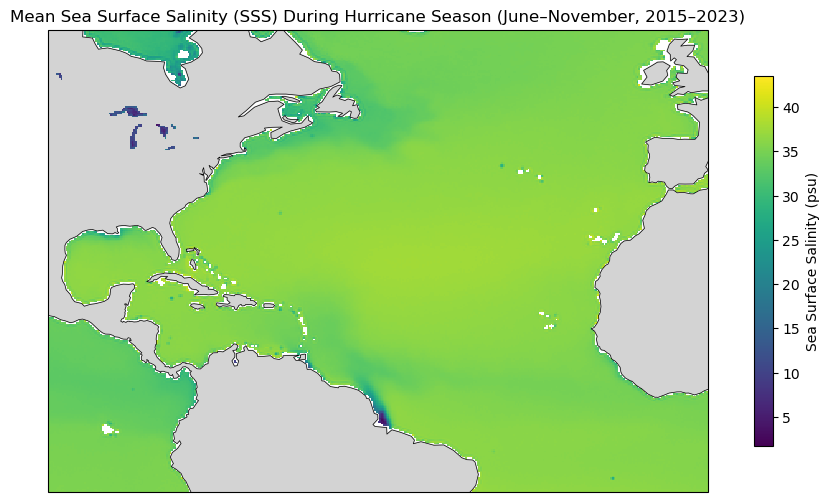

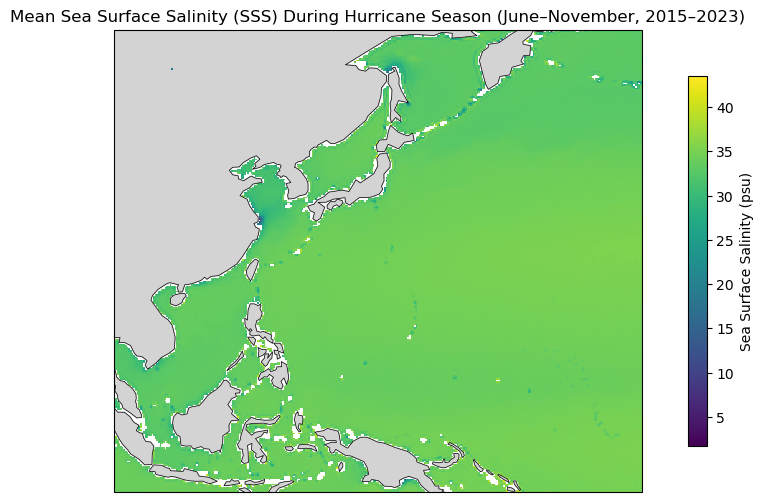

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# 1. Load the NetCDF File

# Path to the NetCDF file
file_path = "/home/jovyan/LEAPCourse-Climate-Pred-Challenges/Project-StarterCodes/Project1-EDAV/lib/data_salinity/sss_avg.nc"

# Open the dataset
ds = xr.open_dataset(file_path)

# Extract salinity data and coordinates
sss_avg = ds["sss_avg"].values  # Extracting sea surface salinity
lon = ds["lon"].values  # Extracting longitude values
lat = ds["lat"].values  # Extracting latitude values


# 2. Function to Plot SSS with Coordinate Configuration

def plot_sss(sss_avg, lon, lat, extent=None):
  
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

    # Configure the coordinate extent (Choose the area of interest)
    if extent:
        ax.set_extent(extent, crs=ccrs.PlateCarree())  # Custom region
    else:
        ax.set_global()  # Default: global map

    # Add land and coastlines
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # Convert lon/lat to 2D arrays for mapping
    lon2D, lat2D = np.meshgrid(lon, lat)

    # Plot the salinity data
    im = ax.pcolormesh(lon2D, lat2D, sss_avg, cmap="viridis", shading="auto", transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", shrink=0.8)
    cbar.set_label("Sea Surface Salinity (psu)")

    ax.set_title("Mean Sea Surface Salinity (SSS) During Hurricane Season (June–November, 2015–2023)")
    plt.show()


# 3. Plot SSS with Customizable Coordinates

# Example: Define a specific region (Atlantic Ocean region)
custom_extent = [-100, 0, -10, 60]  # 

# Example: Define a specific region (West Pacific Ocean region)
custom_extent2 = [100, 180, -10, 60]  # 
# Call the function with a defined extent (Modify as needed)
plot_sss(sss_avg, lon, lat, extent=custom_extent)
plot_sss(sss_avg, lon, lat, extent=custom_extent2)
# Close the dataset
ds.close()
